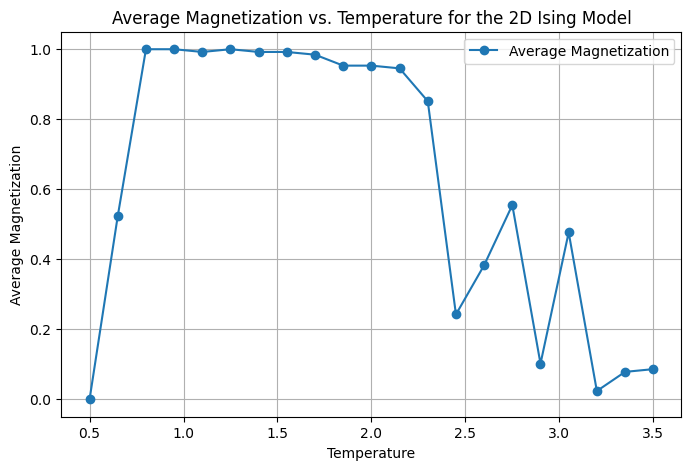

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 29 15:12:11 2024

@author: florentcalvayrac
"""


import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
N = 16  # Grid size for N x N
steps_per_spin = 500  # Monte Carlo steps per spin
total_steps = N * N * steps_per_spin
temperatures = np.linspace(0.5, 3.5, 21)  # Temperature range

def delta_energy(spins, i, j, N):
    """Calculate the energy change from flipping a spin at position (i, j)."""
    total_spin = 0
    for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Neighbors
        # Periodic boundary conditions
        ni, nj = (i + di) % N, (j + dj) % N
        total_spin += spins[ni, nj]
    return 2 * spins[i, j] * total_spin

# Storage for average magnetization at each temperature
magnetizations = []

for T in temperatures:
    spins = np.random.choice([-1, 1], size=(N, N))  # Random initial configuration
    magnetization = []

    for _ in range(total_steps):
        i, j = np.random.randint(0, N, 2)  # Randomly choose a spin
        dE = delta_energy(spins, i, j, N)
        
        if dE <= 0 or np.random.rand() < np.exp(-dE / T):  # Metropolis condition
            spins[i, j] *= -1  # Flip the spin
    
    # Compute the average magnetization for this temperature
    avg_magnetization = np.abs(np.mean(spins))
    magnetizations.append(avg_magnetization)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(temperatures, magnetizations, '-o', label='Average Magnetization')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs. Temperature for the 2D Ising Model')
plt.legend()
plt.grid(True)
plt.show()

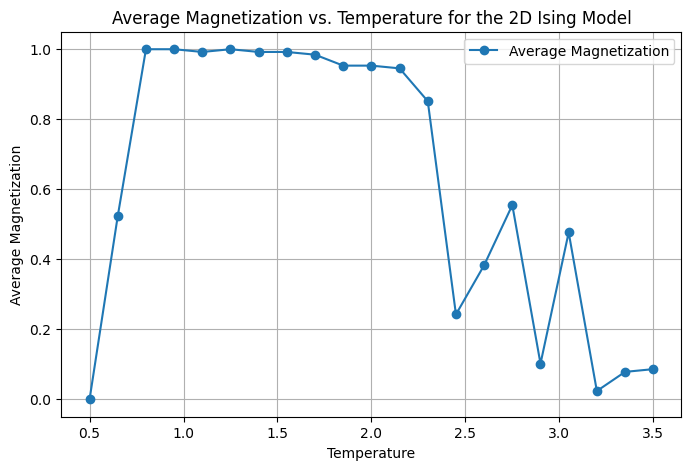

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 29 15:12:11 2024

@author: florentcalvayrac
"""


import numpy as np
import matplotlib.pyplot as plt

# Ising model parameters
N = 16  # Grid size for N x N
steps_per_spin = 500  # Monte Carlo steps per spin
total_steps = N * N * steps_per_spin
temperatures = np.linspace(0.5, 3.5, 21)  # Temperature range

def delta_energy(spins, i, j, N):
    """Calculate the energy change from flipping a spin at position (i, j)."""
    total_spin = 0
    for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:  # Neighbors
        # Periodic boundary conditions
        ni, nj = (i + di) % N, (j + dj) % N
        total_spin += spins[ni, nj]
    return 2 * spins[i, j] * total_spin

# Storage for average magnetization at each temperature
magnetizations = []

for T in temperatures:
    spins = np.random.choice([-1, 1], size=(N, N))  # Random initial configuration
    magnetization = []

    for _ in range(total_steps):
        i, j = np.random.randint(0, N, 2)  # Randomly choose a spin
        dE = delta_energy(spins, i, j, N)
        
        if dE <= 0 or np.random.rand() < np.exp(-dE / T):  # Metropolis condition
            spins[i, j] *= -1  # Flip the spin
    
    # Compute the average magnetization for this temperature
    avg_magnetization = np.abs(np.mean(spins))
    magnetizations.append(avg_magnetization)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(temperatures, magnetizations, '-o', label='Average Magnetization')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization vs. Temperature for the 2D Ising Model')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
print(magnetizations)


[0.0, 0.5234375, 1.0, 1.0, 0.9921875, 1.0, 0.9921875, 0.9921875, 0.984375, 0.953125, 0.953125, 0.9453125, 0.8515625, 0.2421875, 0.3828125, 0.5546875, 0.1015625, 0.4765625, 0.0234375, 0.078125, 0.0859375]
